# Netflix's Highest-Rated Series

**---**

> This is my first project. I would love to hear your thoughts, and any constructive criticism will be taken into account for my future work. I am exploring the world of data analysis and want to focus my path on data science. Thank you for contributing!

**---**

**Data Analysis on [netflix-tv-shows-and-movies]**

This project presents a comprehensive analysis of the *titles.csv* dataset, aiming to explore the ratings of TV series. Using exploratory data analysis (EDA) techniques, the goal is to derive meaningful insights to determine whether the genre and the number of seasons influence the IMDb scores of these series. Additionally, the project seeks to identify the characteristics a new series should have to achieve a rating between 5 and 8 points*.

## Dataset Description
The dataset used in this project comes from [/kaggle/input/netflix-tv-shows-and-movies] and includes titles, the number of seasons, genres, production year, etc.

Although the dataset contains a wide variety of variables, our analysis focuses on only four.
**Key Variables**: title, seasons, genres, imdb_score.

You can download the dataset from [/kaggle/input/netflix-tv-shows-and-movies].

## Project Objectives
1. **Data Exploration**: Perform a descriptive analysis to identify patterns, outliers, and variable distributions.
2. **Data Cleaning**: Handle missing values and data types.
3. **Correlation Analysis**: Assess relationships among the key variables in the dataset.
4. **Visualization**: Create charts and tables to effectively communicate the results and findings.

## Requirements
To run the project in your local environment, you need to install the following libraries:
- pandas
- numpy
- seaborn
- matplotlib.pyplot

## About the Dataset
It includes data related to the U.S. population up until July 2022.

## General Overview
We will import the necessary libraries and take an initial look at the dataset.

## Sobre el DataSet
Incluye los datos pertenecientes a la poblacion de EEUU hasta el mes de Julio del año 2022.

## General Overview
We will import the necessary libraries and take an initial look at the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titles = pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/titles.csv')
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


Now, we will examine the number of non-null rows in each column, as well as the data types they contain.

## Dataset Exploration  

In [2]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

The dataset contains a total of **5,849** titles, representing the number of distinct series in the dataset.  

> **Note:** While a series can be the same but have different seasons, and these seasons might have names different from the original, they are counted as new entries. However, this does not affect the analysis since the genre remains constant despite the seasons.  

Focusing on the **key variables**, we can observe the following data types for these variables:  

- `title` = object  
- `genres` = object  
- `seasons` = float  
- `imdb_score` = float  

Next, we will examine some descriptive parameters of the dataset.  

In [3]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


We observe the following averages for the data of interest:  

- There is a tendency for series to have a minimum of 2 seasons.  
- No series reaches a rating of 9.5 points on IMDb.  
- There is a series with 42 seasons. We will identify its title out of curiosity.  

In [4]:
season_max = titles["seasons"].max()
info_season_max = titles[titles["seasons"] == season_max]
print(info_season_max)

         id     title  type  \
91  ts20981  Survivor  SHOW   

                                          description  release_year  \
91  A reality show contest where sixteen or more c...          2000   

   age_certification  runtime       genres production_countries  seasons  \
91             TV-PG       48  ['reality']               ['US']     42.0   

      imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
91  tt0239195         7.4     24687.0            54.19         7.4  


This corresponds to the series **SURVIVOR**, which has a rating of **7.4**.  
This is an unusual case, as it is rare for a series with such a high number of seasons to maintain such a strong rating. Nonetheless, it allows us to observe this phenomenon.  

## Dataset Cleaning and Manipulation  

In the empty cells of our key variables, we will fill them with the number **0**, but only for variables of type `float`.  
Additionally, we will rename the original variable `"imdb_score"` to `"score"` for easier manipulation.  

In [5]:
# I fill the empty numerical columns with 0.
titles['seasons'] = titles['seasons'].fillna(0)
titles['imdb_score'] = titles['imdb_score'].fillna(0)

# I rename it to "score" for easier handling.
titles = titles.rename(columns={'imdb_score': 'score'})


We will define **new datasets** to facilitate data manipulation, containing the following variables:  

1. `title`, `genres`, `score`  
2. `title`, `seasons`, `score`  

Since there are too many genres, and to make visualization easier later, we will filter the dataset to include only the most frequent genres.  

In [6]:
genres = titles[['title','genres','score']]
seasons = titles [['title','seasons','score']]

# I count how many times each genre appears.
genrestop = genres['genres'].value_counts().head(20).index

# I now filter the genres by those that appear most frequently.
genres20 = genres[genres['genres'].isin(genrestop)]

## Visualization: Genres vs Score  

Since these are variables of different types, we will use a **BoxPlot** to observe the relationship between both variables.  

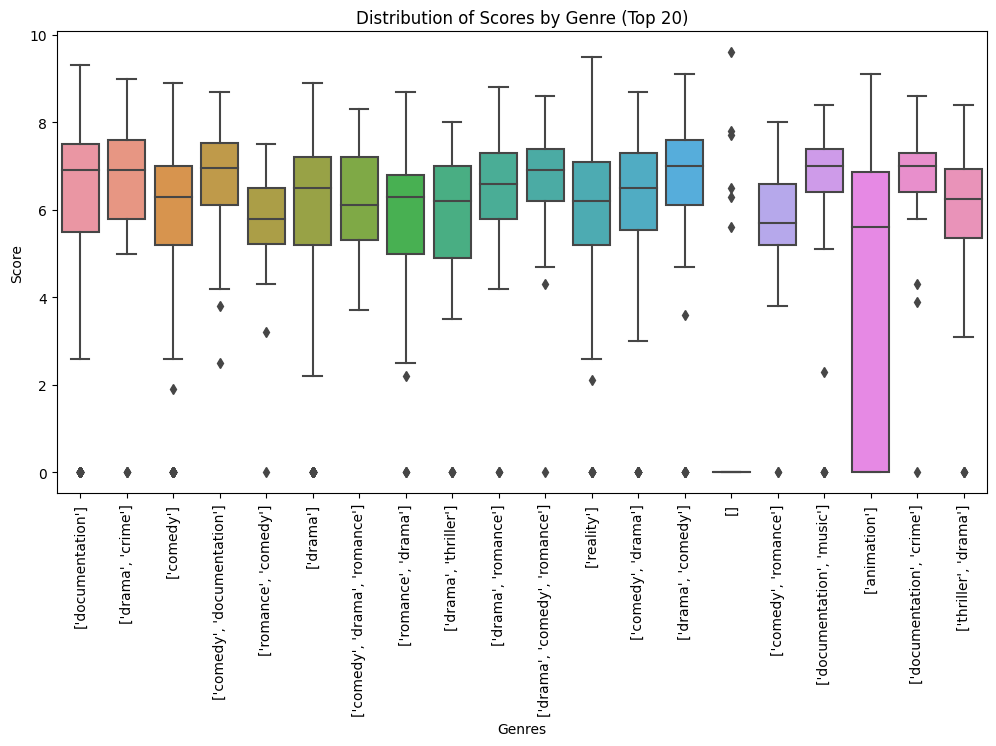

In [7]:
# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='score', data=genres20)

# Rotate the x-axis labels for better visualization
plt.xticks(rotation=90)

# Add title and labels
plt.title('Distribution of Scores by Genre (Top 20)')
plt.xlabel('Genres')
plt.ylabel('Score')

# Display the chart
plt.show()

We can see that series featuring drama as a genre are the most popular among the audience, with ratings ranging between 5 and 7 points.  

> Note that the graph distinguishes the order in which genres appear (e.g., "thriller-drama" is different from "drama-thriller"), but this does not affect the conclusion presented at the end of the analysis.

## Visualization: Seasons vs Score  

Since both variables are numerical or float, a scatter plot has been chosen to easily observe any trends.

Axes(0.125,0.11;0.775x0.77)


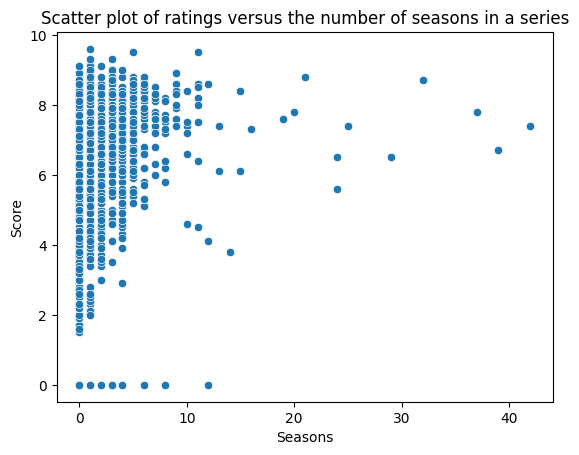

In [8]:
# Scatter plot for score vs seasons

dispersion_seasons = sns.scatterplot (x = 'seasons', y = 'score', data = seasons)
plt.title ('Scatter plot of ratings versus the number of seasons in a series')
plt.xlabel("Seasons")
plt.ylabel("Score")
print (dispersion_seasons)

We can observe two key points:  
1. A strong concentration of series with up to 3 seasons.  
2. The outlier data from the series **SURVIVOR**.

## Conclusion

From the analysis, we’ve identified two key factors that significantly influence the success of a series in the U.S. audience:

1. **The "drama" genre**: Series categorized as "drama," or those that include this genre, tend to get more acceptance from the U.S. audience. This suggests that producers should consider the drama genre as a strategic choice to increase the chances of a series' success.

2. **Number of seasons**: While there are exceptions, series with up to **5 seasons** tend to get the best ratings. This shows that to perform well with both critics and viewers, it’s important not to stretch a series too long. A limited number of seasons, but well-developed, might be key to keeping the quality and viewer interest high.

In short, for content producers, it’s essential to consider these two factors when creating and developing a series: focusing on the drama genre and keeping the number of seasons limited, ideally up to the fifth season, can be a game-changer for a series' success in the U.S. market.